In [1]:
#pip install -U albumentations

In [1]:
import os
import cv2
from tqdm import tqdm
from glob import glob
from albumentations import CenterCrop, RandomRotate90, GridDistortion, HorizontalFlip, VerticalFlip

In [2]:
path = "/Users/veronika/Documents/FESB_MLID/"

In [3]:
def load_data(path):
    images = sorted(
        [
            os.path.join(path + 'images/', fname)
            for fname in os.listdir(path + 'images/')
            if fname.endswith(".jpg")
        ])
    masks = sorted(
    [
        os.path.join(path + "png_masks/", fname)
        for fname in os.listdir(path + "png_masks/")
        if fname.endswith(".png") and not fname.startswith(".")
    ])
    return images, masks

In [4]:
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

In [5]:
def augment_data(images, masks, save_path, augment=True):
    HEIGHT = 256
    WIDTH = 256

    for image, mask in tqdm(zip(images, masks), total=len(images)):
        name = image.split("/")[-1].split(".")
        """ Extracting the name and extension of the image and the mask. """
        image_name = name[0]
        image_extn = name[1]

        name = mask.split("/")[-1].split(".")
        mask_name = name[0]
        mask_extn = name[1]

        """ Reading image and mask. """
        image = cv2.imread(image, cv2.IMREAD_COLOR)
        mask = cv2.imread(mask, cv2.IMREAD_COLOR)

        """ Augmentation """
        if augment == True:
            aug = CenterCrop(HEIGHT, WIDTH, p=1.0)
            augmented = aug(image=image, mask=mask)
            image1 = augmented["image"]
            mask1 = augmented["mask"]

            aug = RandomRotate90(p=1.0)
            augmented = aug(image=image, mask=mask)
            image2 = augmented['image']
            mask2 = augmented['mask']

            aug = GridDistortion(p=1.0)
            augmented = aug(image=image, mask=mask)
            image3 = augmented['image']
            mask3 = augmented['mask']

            aug = HorizontalFlip(p=1.0)
            augmented = aug(image=image, mask=mask)
            image4 = augmented['image']
            mask4 = augmented['mask']

            save_images = [image, image1, image2, image3, image4]
            save_masks =  [mask, mask1, mask2, mask3, mask4]

        else:
            save_images = [image]
            save_masks = [mask]

        """ Saving the image and mask. """
        idx = 0
        for image, mask in zip(save_images, save_masks):
            image = cv2.resize(image, (512, 512))
            mask = cv2.resize(mask, (512, 512))

            if len(images) == 1:
                tmp_img_name = f"{image_name}.{image_extn}"
                tmp_mask_name = f"{mask_name}.{mask_extn}"

            else:
                tmp_img_name = f"{image_name}_{idx}.{image_extn}"
                tmp_mask_name = f"{mask_name}_{idx}.{mask_extn}"

            image_path = os.path.join(save_path, "images", tmp_img_name)
            mask_path = os.path.join(save_path, "png_masks", tmp_mask_name)

            cv2.imwrite(image_path, image)
            cv2.imwrite(mask_path, mask)

            idx += 1

In [6]:
images, masks = load_data(path)
print(f"Original Images: {len(images)} - Original Masks: {len(masks)}")

Original Images: 400 - Original Masks: 400


In [7]:
create_dir(path + "new_data/images")
create_dir(path + "new_data/png_masks")

In [8]:
augment_data(images, masks, "/Users/veronika/Documents/FESB_MLID/new_data", augment=True)

100%|██████████| 400/400 [00:41<00:00,  9.60it/s]


In [9]:
images, masks = load_data(path + "new_data/")
print(f"Augmented Images: {len(images)} - Augmented Masks: {len(masks)}")

Augmented Images: 2000 - Augmented Masks: 2000


Images and their masks:
/Users/veronika/Documents/FESB_MLID/new_data/images/src_101_0.jpg | /Users/veronika/Documents/FESB_MLID/new_data/png_masks/gt_101_0.png


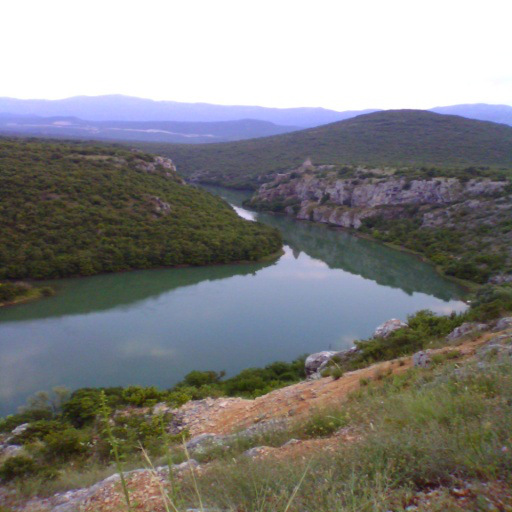

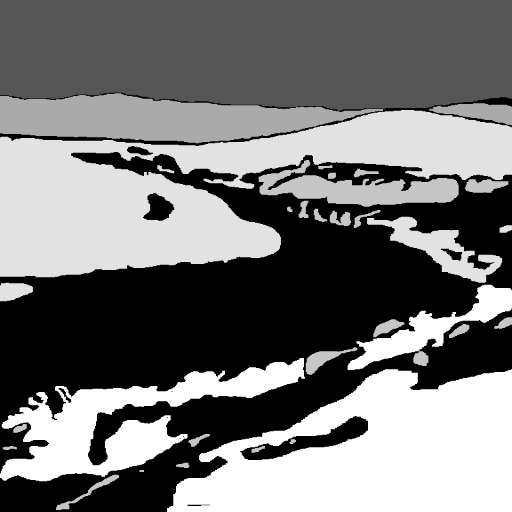

/Users/veronika/Documents/FESB_MLID/new_data/images/src_101_1.jpg | /Users/veronika/Documents/FESB_MLID/new_data/png_masks/gt_101_1.png


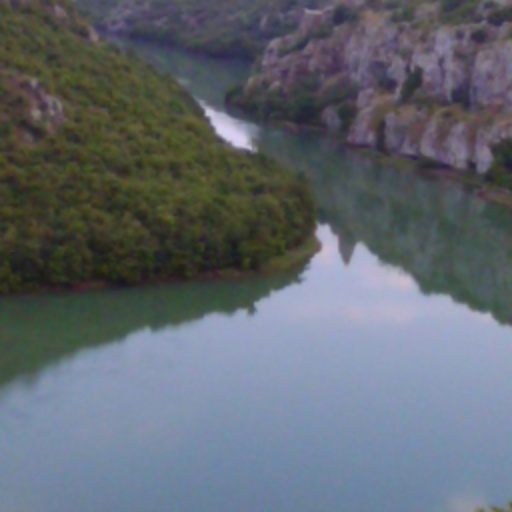

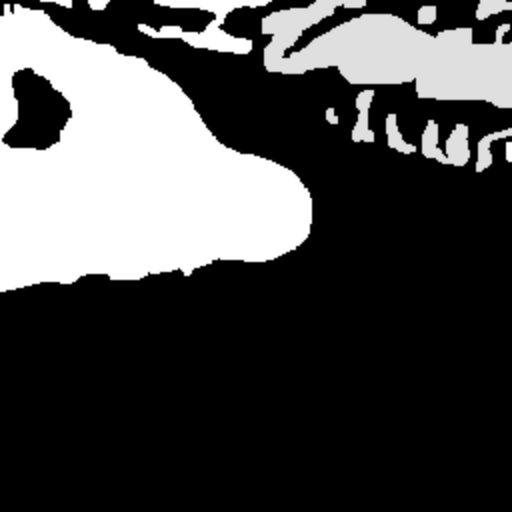

/Users/veronika/Documents/FESB_MLID/new_data/images/src_101_2.jpg | /Users/veronika/Documents/FESB_MLID/new_data/png_masks/gt_101_2.png


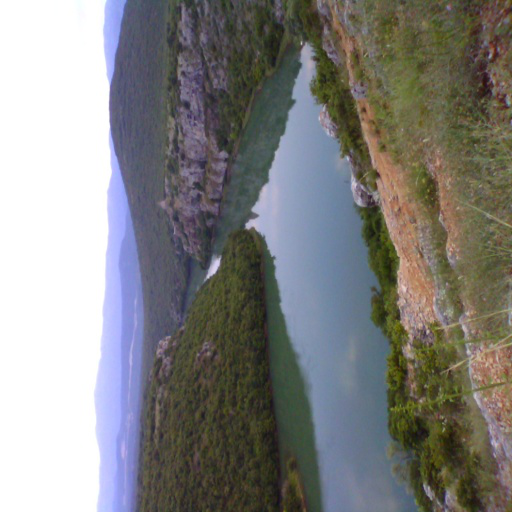

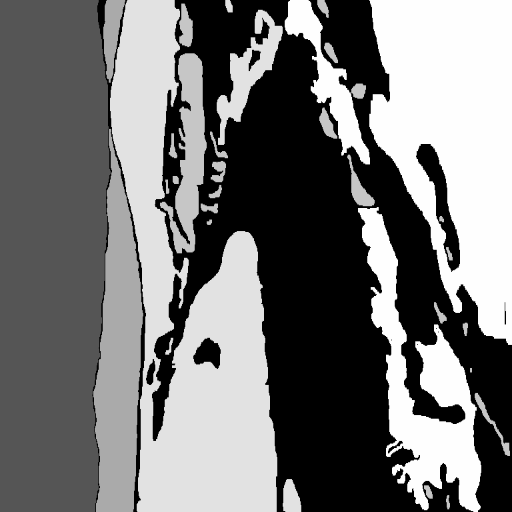

/Users/veronika/Documents/FESB_MLID/new_data/images/src_101_3.jpg | /Users/veronika/Documents/FESB_MLID/new_data/png_masks/gt_101_3.png


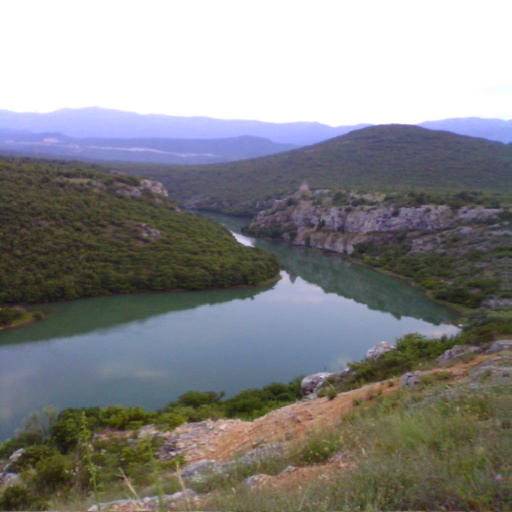

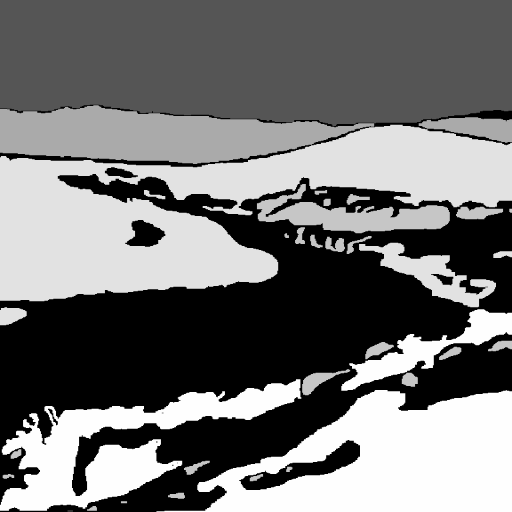

/Users/veronika/Documents/FESB_MLID/new_data/images/src_101_4.jpg | /Users/veronika/Documents/FESB_MLID/new_data/png_masks/gt_101_4.png


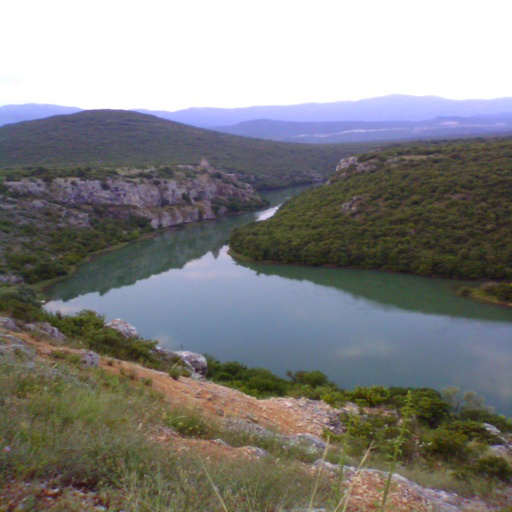

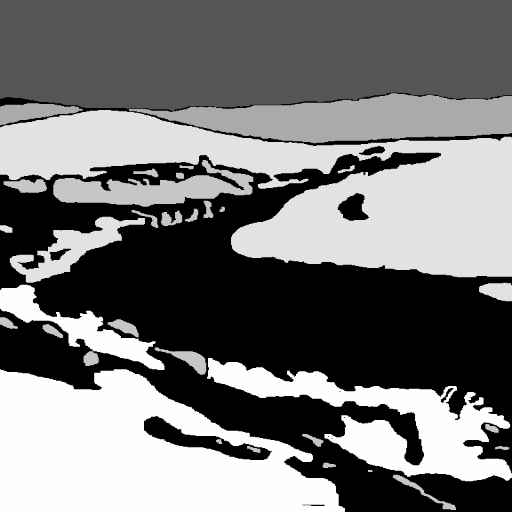

In [10]:
import PIL
from PIL import Image, ImageOps
from keras.preprocessing.image import load_img

input_dir = "/Users/veronika/Documents/FESB_MLID/new_data/images"
target_dir = "/Users/veronika/Documents/FESB_MLID/new_data/png_masks"

input_img_paths = sorted(
    [
        os.path.join(input_dir, fname)
        for fname in os.listdir(input_dir)
        if fname.endswith(".jpg")
    ]
)

target_img_paths = sorted(
    [
        os.path.join(target_dir, fname)
        for fname in os.listdir(target_dir)
        if fname.endswith(".png") and not fname.startswith(".")
    ]
)

print("Images and their masks:")
for input_path, target_path in zip(input_img_paths[5:10], target_img_paths[5:10]):
    print(input_path, "|", target_path)

    display(Image.open(input_path))
    
    img = PIL.ImageOps.autocontrast(load_img(target_path))
    display(img)
    